In [1]:
import os #Thư viện để thực hiện các thao tác liên quan đến hệ thống tệp.
import cv2 #Thư viện để đọc hình ảnh
import numpy as np # thư viện làm việc với mảng đa chiều
from tqdm import tqdm #thư viện hiển thị thanh tiến trình
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.utils import shuffle # trộn ngẫu nhiên các mảng
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Input, Lambda, Dense, Flatten, Activation, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import applications

In [2]:
train = list(os.walk('/kaggle/input/animal10/Animals-10')) 

In [3]:
label_names = train[0][1]
dict_labels = dict(zip(label_names, list(range(len(label_names)))))
print(dict_labels)

{'spider': 0, 'horse': 1, 'butterfly': 2, 'dog': 3, 'chicken': 4, 'elephant': 5, 'sheep': 6, 'cow': 7, 'squirrel': 8, 'cat': 9}


In [4]:
def dataset(path): # put path till the highest directory level
    images = []
    labels = []
    for folder in tqdm(os.listdir(path)):
    
# dict_labels is the dictionary whose key:value pairs are classes:numbers 
# representing them
        value_of_label = dict_labels[folder] 

        for file in (os.listdir(os.path.join(path, folder))):
            path_of_file = os.path.join(os.path.join(path, folder), file)
            image = cv2.imread(path_of_file)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (150, 150))
            images.append(image)
            labels.append(value_of_label)
    images = np.array(images, dtype = 'float32')/255.0
    labels = np.array(labels)

    return images, labels

images, labels = dataset('/kaggle/input/animal10/Animals-10')
images, labels = shuffle(images, labels)

 20%|██        | 2/10 [00:28<01:48, 13.58s/it]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrec

In [5]:
print(images.shape)

(26179, 150, 150, 3)


horse


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


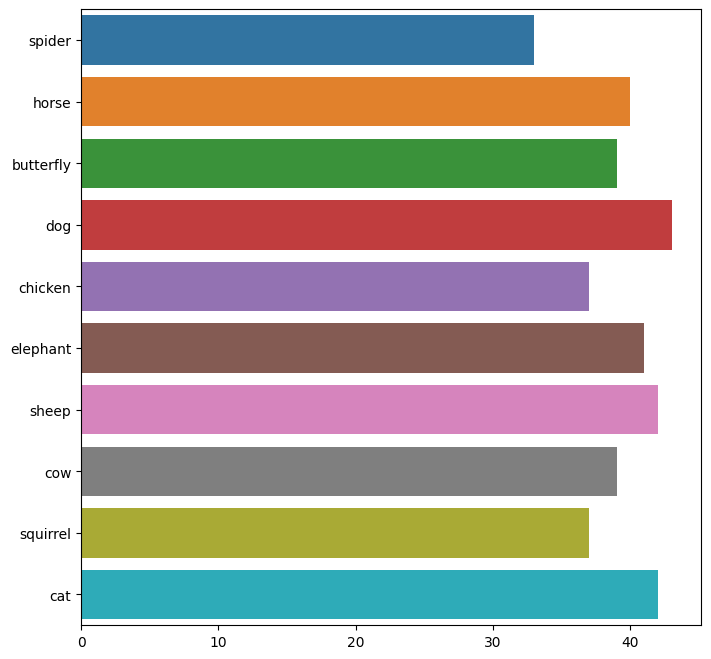

In [6]:
animals = train[0][1]
print(animals[1])
no_of_animals = []
for _ in range(0, 10):
    no_of_animals.append(len(train[_][0]))
plt.figure(figsize = (8, 8))
sns.barplot(y = animals, x = no_of_animals);

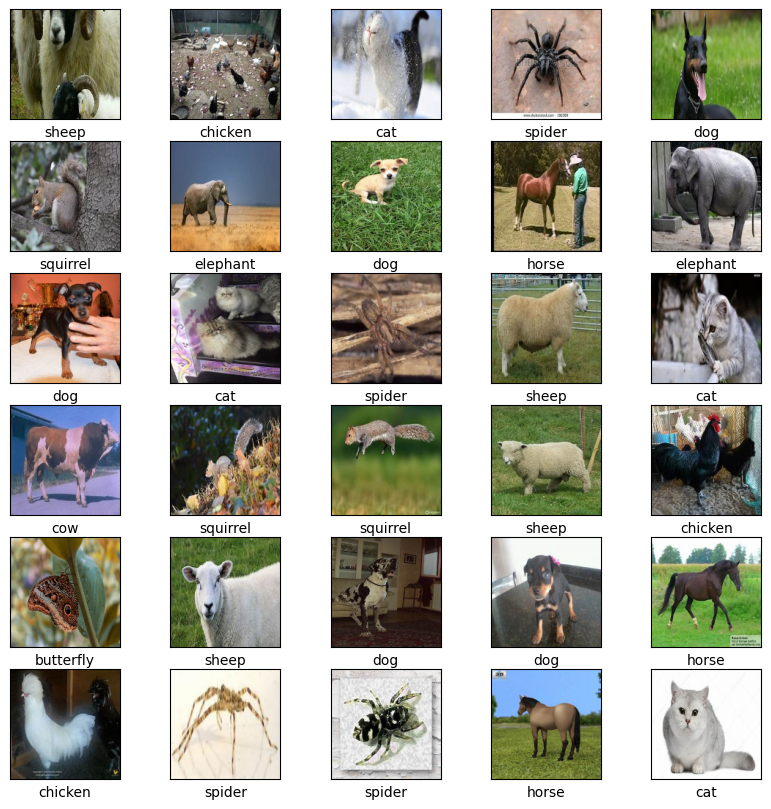

In [7]:
plt.figure(figsize=(10,10))
for _ in range(30):
    plt.subplot(6,5, _+1)
    plt.yticks([])
    plt.xticks([])
    plt.grid(False)
    data = images[_]
    plt.xlabel(label_names[labels[_]])
    plt.imshow(data)

In [8]:
# train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)


train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/animal10/Animals-10',
    target_size=(128, 128),
    batch_size=64,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
   '/kaggle/input/animal10/Animals-10',
    target_size=(128, 128),
    batch_size=64,
    class_mode='categorical',
    subset='validation')

Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


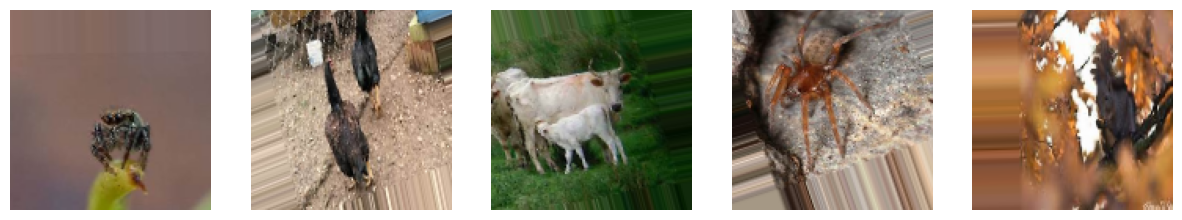

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,15))

for i in range(5):
    image = next(train_generator)[0][0]
    image = np.squeeze(image)
    ax[i].imshow(image)
    ax[i].axis(False)

In [10]:
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
# from tensortflow.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout, Add


In [11]:
# model = models.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), padding= 'same'),
#     layers.MaxPooling2D((2, 2)),

#     layers.Conv2D(64, (3, 3), activation='relu', padding= 'same'),
#     layers.MaxPooling2D((2, 2)),

#     layers.Conv2D(128, (3, 3), activation='relu', padding= 'same'),
#     layers.MaxPooling2D((2, 2)),
    
#     layers.Conv2D(256, (3, 3), activation='relu', padding= 'same'),
#     layers.MaxPooling2D((2, 2)),
    
#     layers.Conv2D(512, (3, 3), activation='relu', padding= 'same'),
#     layers.MaxPooling2D((2, 2)),
    
#     layers.Conv2D(1024, (3, 3), activation='relu', padding= 'same'),
#     layers.MaxPooling2D((2, 2)),
    
#     layers.Flatten(),
#     layers.Dense(512, activation='relu'),
#     layers.Dense(256, activation='relu'),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(10, activation='softmax')
# ])



In [12]:
# model = models.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2), strides=2),
#     layers.Dropout(0.3),  # Thêm Dropout

#     layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2), strides=2),
#     layers.Dropout(0.3),  # Thêm Dropout

#     layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2), strides=2),
#     layers.Dropout(0.3),  # Thêm Dropout

#     layers.GlobalAveragePooling2D(),
#     layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
#     layers.Dropout(0.4),
#     layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
#     layers.Dropout(0.4),
#     layers.Dense(10, activation='softmax')
# ])


In [13]:
# model = models.Sequential([
#     layers.Conv2D(32, (5, 5), activation='relu', input_shape=(128, 128, 3), padding='same', strides=1),
#     layers.MaxPooling2D((2, 2), strides=2),

#     layers.Conv2D(64, (5, 5), activation='relu', padding='same', strides=1),
#     layers.MaxPooling2D((2, 2),strides=2),

#     layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
#     layers.MaxPooling2D((2, 2),strides=2),

#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(10, activation='softmax')
# ])

In [14]:
# model = tf.keras.applications.ResNet50(
#     include_top=True,
#     weights=None,
#     input_tensor=None,
#     input_shape=(224, 224, 3),
#     pooling=None,
#     classes=10,
#     classifier_activation='softmax'
# )

In [15]:
# from tensorflow.keras import layers, models
# from tensorflow.keras.applications import ResNet50

# base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
# base_model.trainable = False  # Đóng băng các lớp của ResNet50

# model = models.Sequential([
#     base_model,
#     layers.GlobalAveragePooling2D(name='global_average_pooling2d_9'),
#     layers.Dense(128, activation='relu', name='dense_22'),
#     layers.Dropout(0.5, name='dropout_22'),
#     layers.Dense(10, activation='softmax', name='dense_23')
# ])


# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()


In [16]:
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [17]:
# from tensorflow.keras.optimizers import Adam
# optimizer = Adam(learning_rate=0.001)

# model.compile(optimizer=optimizer,
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# model.compile(
#     optimizer='adam',
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [18]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
History = model.fit(train_generator, epochs=20, validation_data=validation_generator, callbacks=[early_stopping])
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# History = model.fit(train_generator,epochs = 20,validation_data = validation_generator)
# model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // 32,
#     epochs=10,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.samples // 32
# )

# model.save('animal_classifier.h5')

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1728915654.662216      90 service.cc:145] XLA service 0x79b24800c040 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728915654.662286      90 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  1/328 ━━━━━━━━━━━━━━━━━━━━ 1:07:19 12s/step - accuracy: 0.0938 - loss: 2.9233

I0000 00:00:1728915662.981849      90 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


328/328 ━━━━━━━━━━━━━━━━━━━━ 152s 429ms/step - accuracy: 0.1786 - loss: 2.3557 - val_accuracy: 0.3578 - val_loss: 1.9054
Epoch 2/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 136s 409ms/step - accuracy: 0.3732 - loss: 1.8929 - val_accuracy: 0.4688 - val_loss: 1.6603
Epoch 3/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 136s 408ms/step - accuracy: 0.4555 - loss: 1.6702 - val_accuracy: 0.5185 - val_loss: 1.5059
Epoch 4/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 135s 405ms/step - accuracy: 0.4846 - loss: 1.5589 - val_accuracy: 0.5495 - val_loss: 1.4077
Epoch 5/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 135s 405ms/step - accuracy: 0.5098 - loss: 1.4764 - val_accuracy: 0.5656 - val_loss: 1.3359
Epoch 6/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 134s 402ms/step - accuracy: 0.5294 - loss: 1.4074 - val_accuracy: 0.5950 - val_loss: 1.2804
Epoch 7/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 135s 405ms/step - accuracy: 0.5539 - loss: 1.3430 - val_accuracy: 0.5958 - val_loss: 1.2365
Epoch 8/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 137s 412ms/step - accuracy: 0.5645 - loss: 1.30

82/82 ━━━━━━━━━━━━━━━━━━━━ 27s 325ms/step
Accuracy: 0.13474770642201836
Classification Report:
               precision    recall  f1-score   support

   butterfly       0.06      0.05      0.05       422
         cat       0.04      0.02      0.03       333
     chicken       0.13      0.14      0.13       619
         cow       0.07      0.05      0.06       373
         dog       0.21      0.26      0.23       972
    elephant       0.02      0.01      0.02       289
       horse       0.09      0.08      0.09       524
       sheep       0.09      0.08      0.09       364
      spider       0.19      0.23      0.21       964
    squirrel       0.07      0.06      0.06       372

    accuracy                           0.13      5232
   macro avg       0.10      0.10      0.10      5232
weighted avg       0.12      0.13      0.13      5232



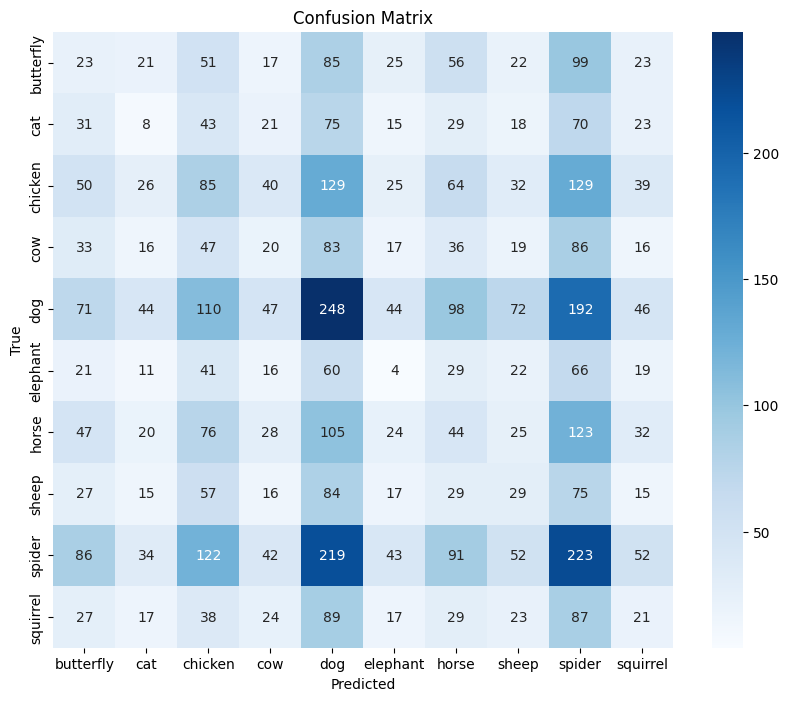

In [19]:
from sklearn.metrics import accuracy_score, classification_report

# Dự đoán trên tập dữ liệu kiểm tra
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes

# Tính toán độ chính xác
accuracy = accuracy_score(true_classes, predicted_classes)
print("Accuracy:", accuracy)

# Báo cáo phân loại
report = classification_report(true_classes, predicted_classes, target_names=validation_generator.class_indices.keys())
print("Classification Report:\n", report)

# Hiển thị ma trận nhầm lẫn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


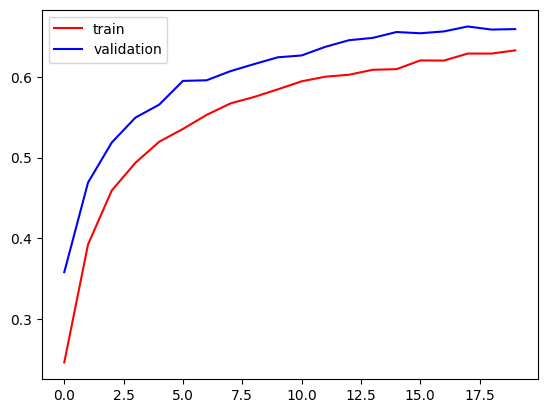

In [20]:
import matplotlib.pyplot as plt

plt.plot(History.history['accuracy'],color='red',label='train')
plt.plot(History.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

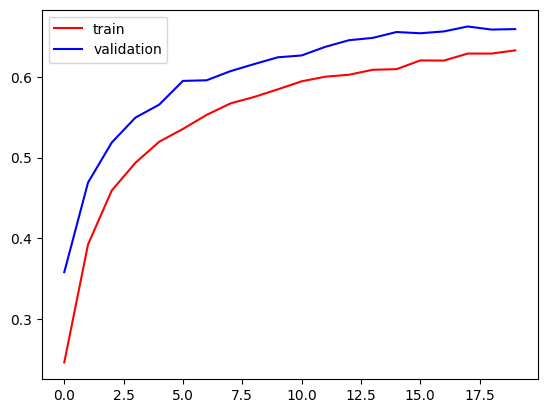

In [21]:
plt.plot(History.history['accuracy'],color='red',label='train')
plt.plot(History.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

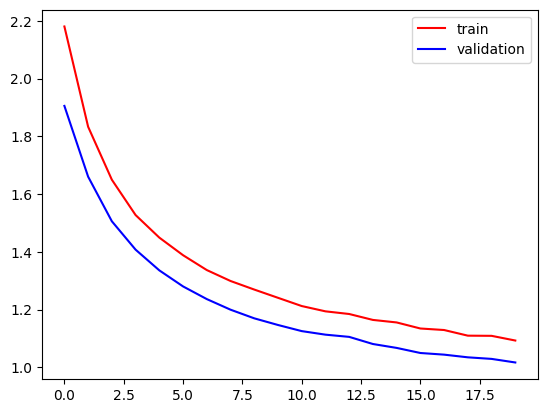

In [22]:
plt.plot(History.history['loss'],color='red',label='train')
plt.plot(History.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [23]:
model.save("animal_classifier.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 920ms/step
The given image is of 
Class: 0 
Animal: butterfly


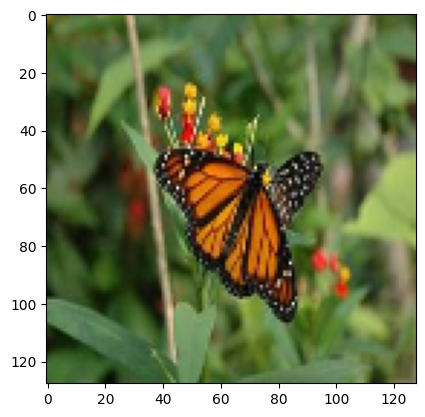

In [24]:
def predictor(img, model):
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (128, 128))
    plt.imshow(image)
    image = image.reshape(1, 128,128,3)
    label_names = train_generator.class_indices
    dict_class = dict(zip(list(range(len(label_names))), label_names))
    clas = model.predict(image).argmax()
    name = dict_class[clas]
    print('The given image is of \nClass: {0} \nAnimal: {1}'.format(clas, name))
my_model = models.load_model('animal_classifier.h5')
predictor('/kaggle/input/animals10/raw-img/farfalla/OIP--7K5JzW1ZEmrY2YRyVjFCQHaE7.jpeg',my_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
The given image is of 
Class: 2 
Animal: chicken


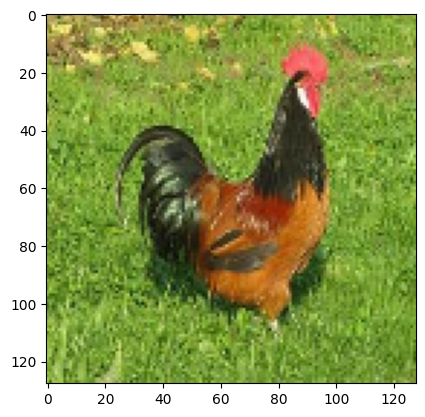

In [25]:
my_model = models.load_model('animal_classifier.h5')
predictor('/kaggle/input/animal10/Animals-10/chicken/chicken (10).jpeg',my_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
The given image is of 
Class: 4 
Animal: dog


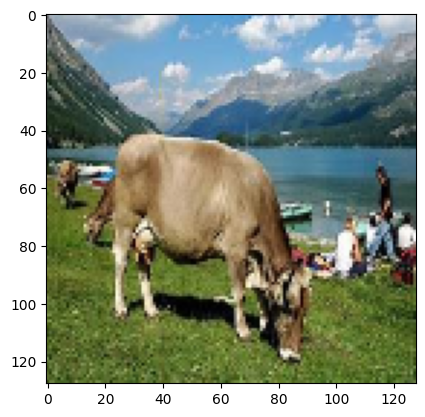

In [26]:
my_model = models.load_model('animal_classifier.h5')
predictor('/kaggle/input/animals10/raw-img/mucca/OIP--oaMcE_WNhA-HDJiF4CvNAHaFF.jpeg',my_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
The given image is of 
Class: 4 
Animal: dog


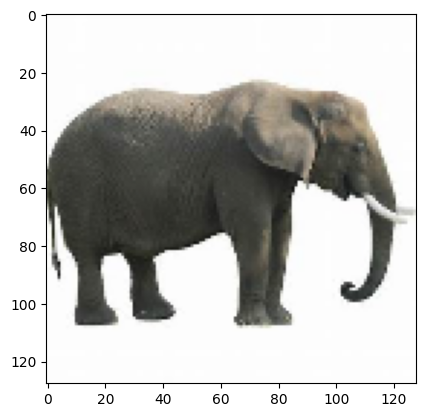

In [27]:
my_model = models.load_model('animal_classifier.h5')
predictor('/kaggle/input/animals10/raw-img/elefante/OIP--NEqn4JVnn251xGu7ss4bQHaHa.jpeg',my_model)